# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Import the dataset

In [2]:
# Import the "Wholesale Data" dataset
wholesales_df = pd.read_csv('../data/Wholesale_Data.csv')
wholesales_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# checking the Dataset info details
wholesales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## Step 2: Data Cleaning


In [6]:
# Checking the shape of the dataset
wholesales_df.shape

(440, 8)

In [8]:
# checking for duplicated values
wholesales_df.duplicated().sum()

0

## Step 3: Data Visualization and Analysis

In [9]:
# Generate summary statistics such as mean, median, and standard deviation for each column of the dataset.
wholesales_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


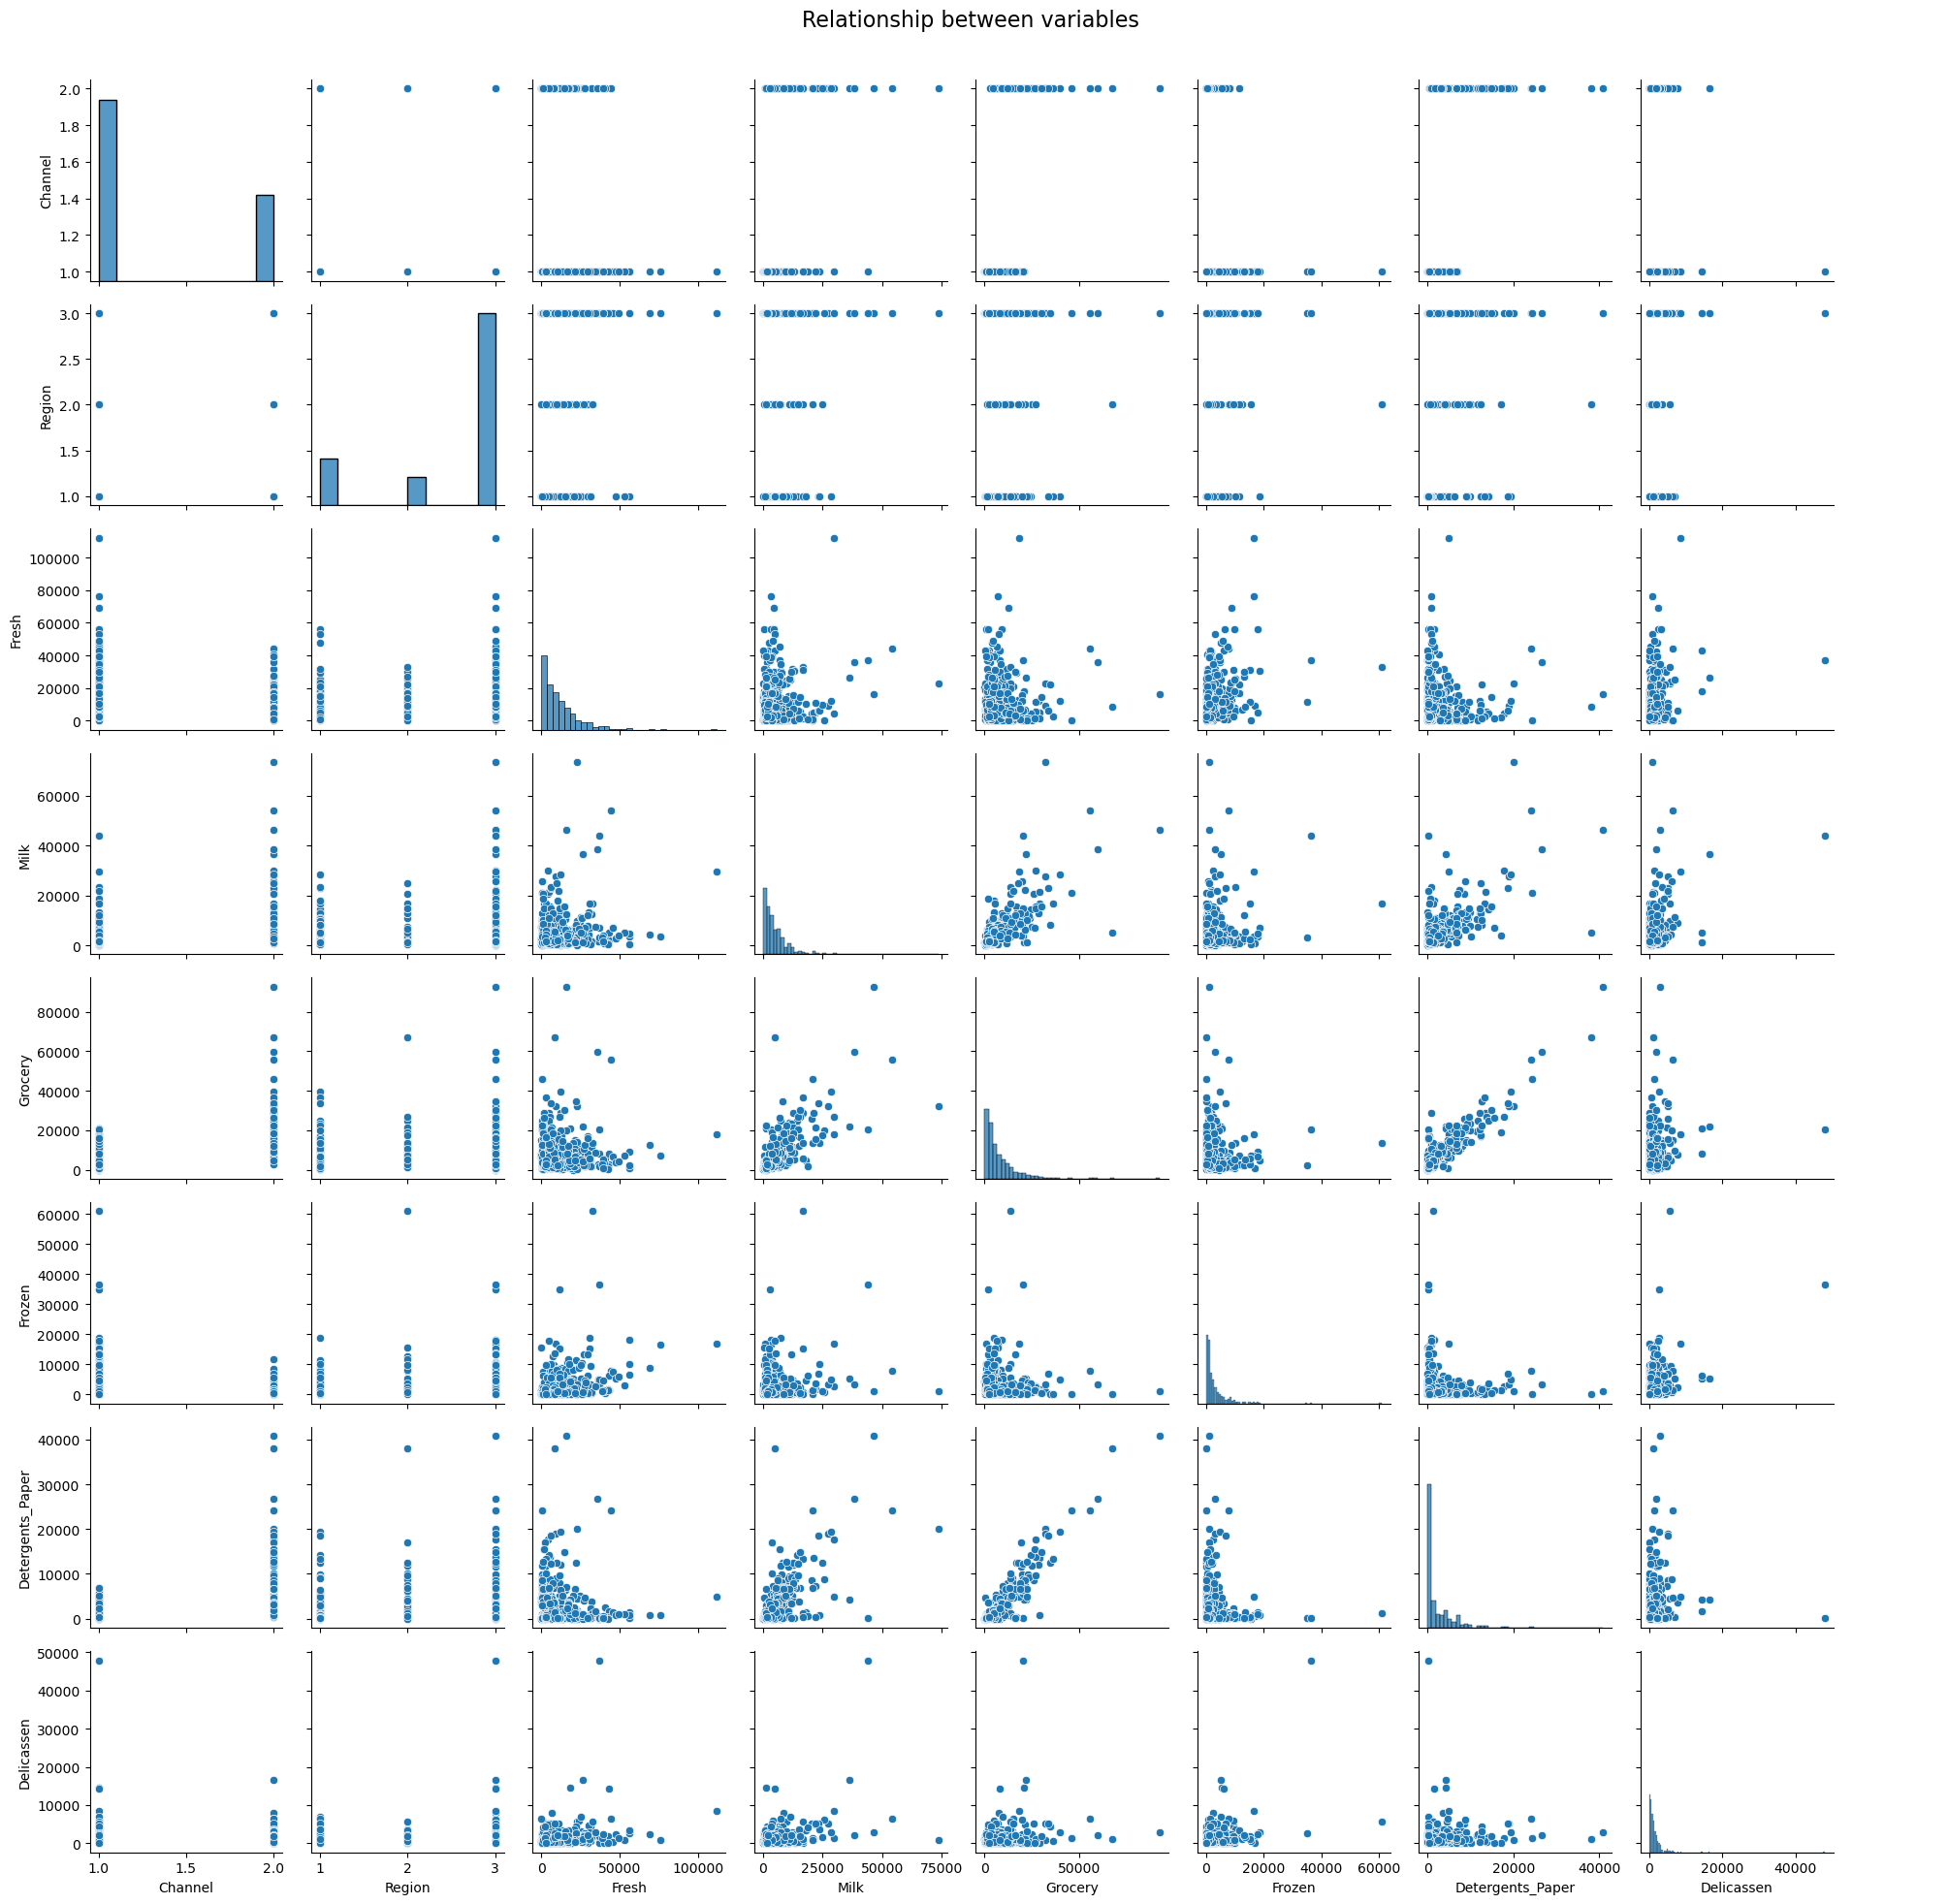

In [10]:
# Create a Pairplot to visualize relationships between variables
g = sns.pairplot(wholesales_df)
g.add_legend()

# Set the title at the top middle of the pair plot
plt.subplots_adjust(top=0.95)
g.fig.suptitle("Relationship between variables", fontsize=16)

# Use plt.tight_layout() to adjust the layout
plt.tight_layout(rect=[0, 0, 0.95, 0.97])
plt.show()

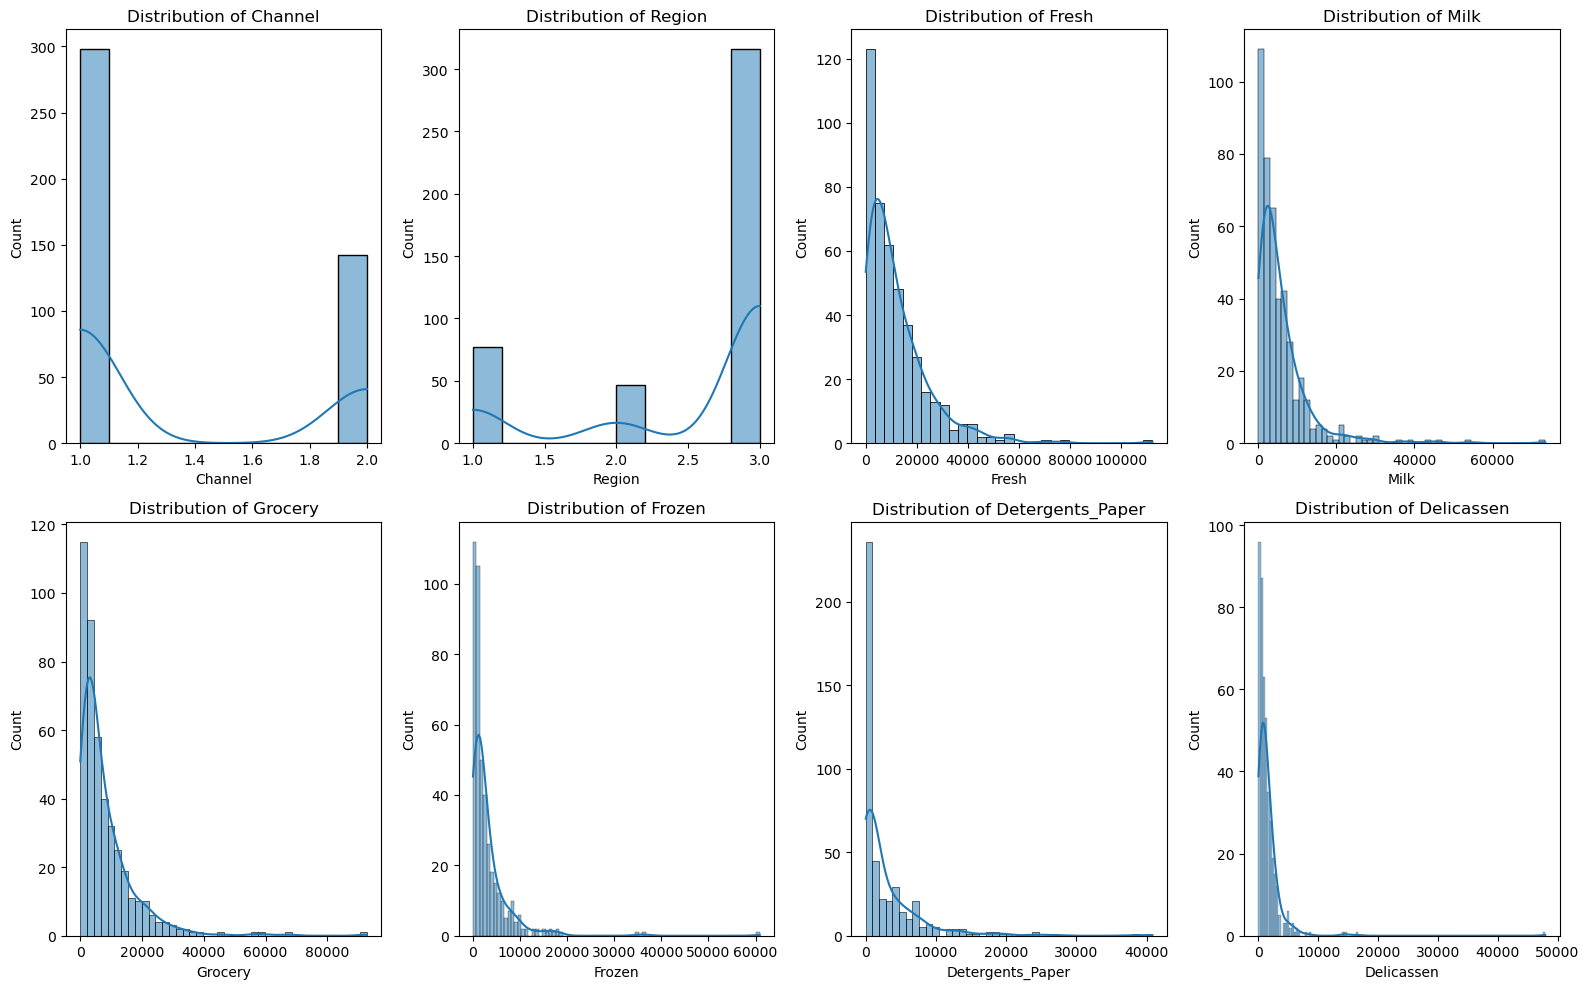

In [12]:
# Creating a Histogram for the variables
# Determine the number of rows and columns for your subplot grid
n = len(wholesales_df.columns)
ncols = 4
nrows = n // ncols + n % ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 5*nrows))

for ax, column in zip(axes.flatten(), wholesales_df.columns):
    sns.histplot(data=wholesales_df, x=column, multiple="stack", kde=True, ax=ax)
    ax.set_title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

The above set of histograms representing the distribution of wholesale data. Histograms, by nature, measure continuous data, and these histograms are no exception. However, not all data represented here follow a Gaussian or normal distribution.

For instance, some of the histograms show a skewed distribution, meaning the data points tend to lean more towards one side of the scale than the other. This is particularly noticeable in the histograms for 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', and 'Delicassen'.

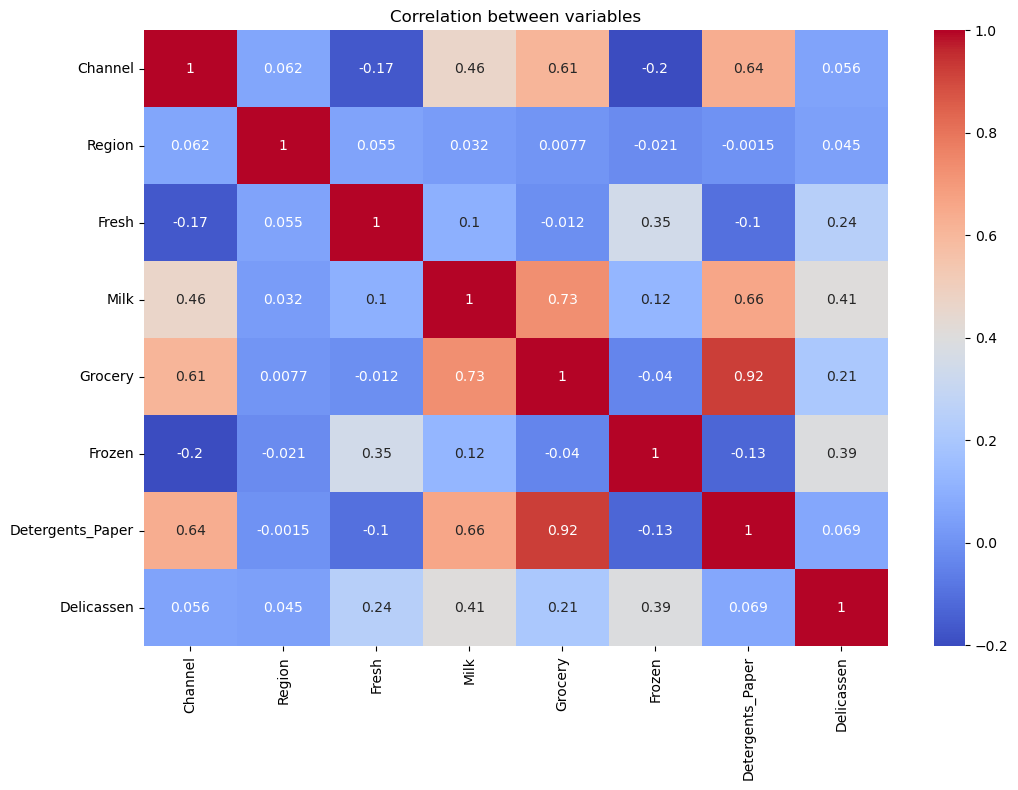

In [13]:
# Correlation heatmap between feature variables
plt.figure(figsize=(12,8))
corr = wholesales_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between variables')
plt.show()

Based on the descriptive statistics provided, we can make the following observations:

- **Complete Data**: The dataset is complete with 440 entries in each column and no missing values, which is a positive aspect.
- **Unique Entries**: There are no duplicate rows in the dataset.
- **Categorical Variables**: 'Channel' and 'Region' appear to be categorical variables. 'Channel' has two categories (1 and 2), and 'Region' has three categories (1, 2, 3).
- **Varying Scales**: The means and standard deviations for each feature differ significantly, suggesting that the data covers a wide range of values. This could affect certain machine learning models sensitive to the scale of input features, and feature scaling might be necessary.
- **Presence of Outliers**: The significant difference between the 75% percentile (Q3) and the maximum values for each feature indicates the presence of outliers. For example, the 'Fresh' feature's 75% percentile is at 16933.75, but the maximum value is 112151. These outliers could potentially skew your model.
- **Right Skewness**: Features like 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', and 'Delicassen' exhibit right skewness (mean > median), which could affect the performance of some machine learning algorithms.
- **Feature Correlation**: Examining the correlation matrix (which can be generated during Exploratory Data Analysis, even though it's not provided in your output) is crucial. Correlation between features can alert us to potential multi-collinearity, and correlation of features with the target variable can highlight important features.

## Step 4: Outlier Detection and Handling

The number of outliers in Fresh is 20
The number of outliers in Milk is 28
The number of outliers in Grocery is 24
The number of outliers in Frozen is 43
The number of outliers in Detergents_Paper is 30
The number of outliers in Delicassen is 27


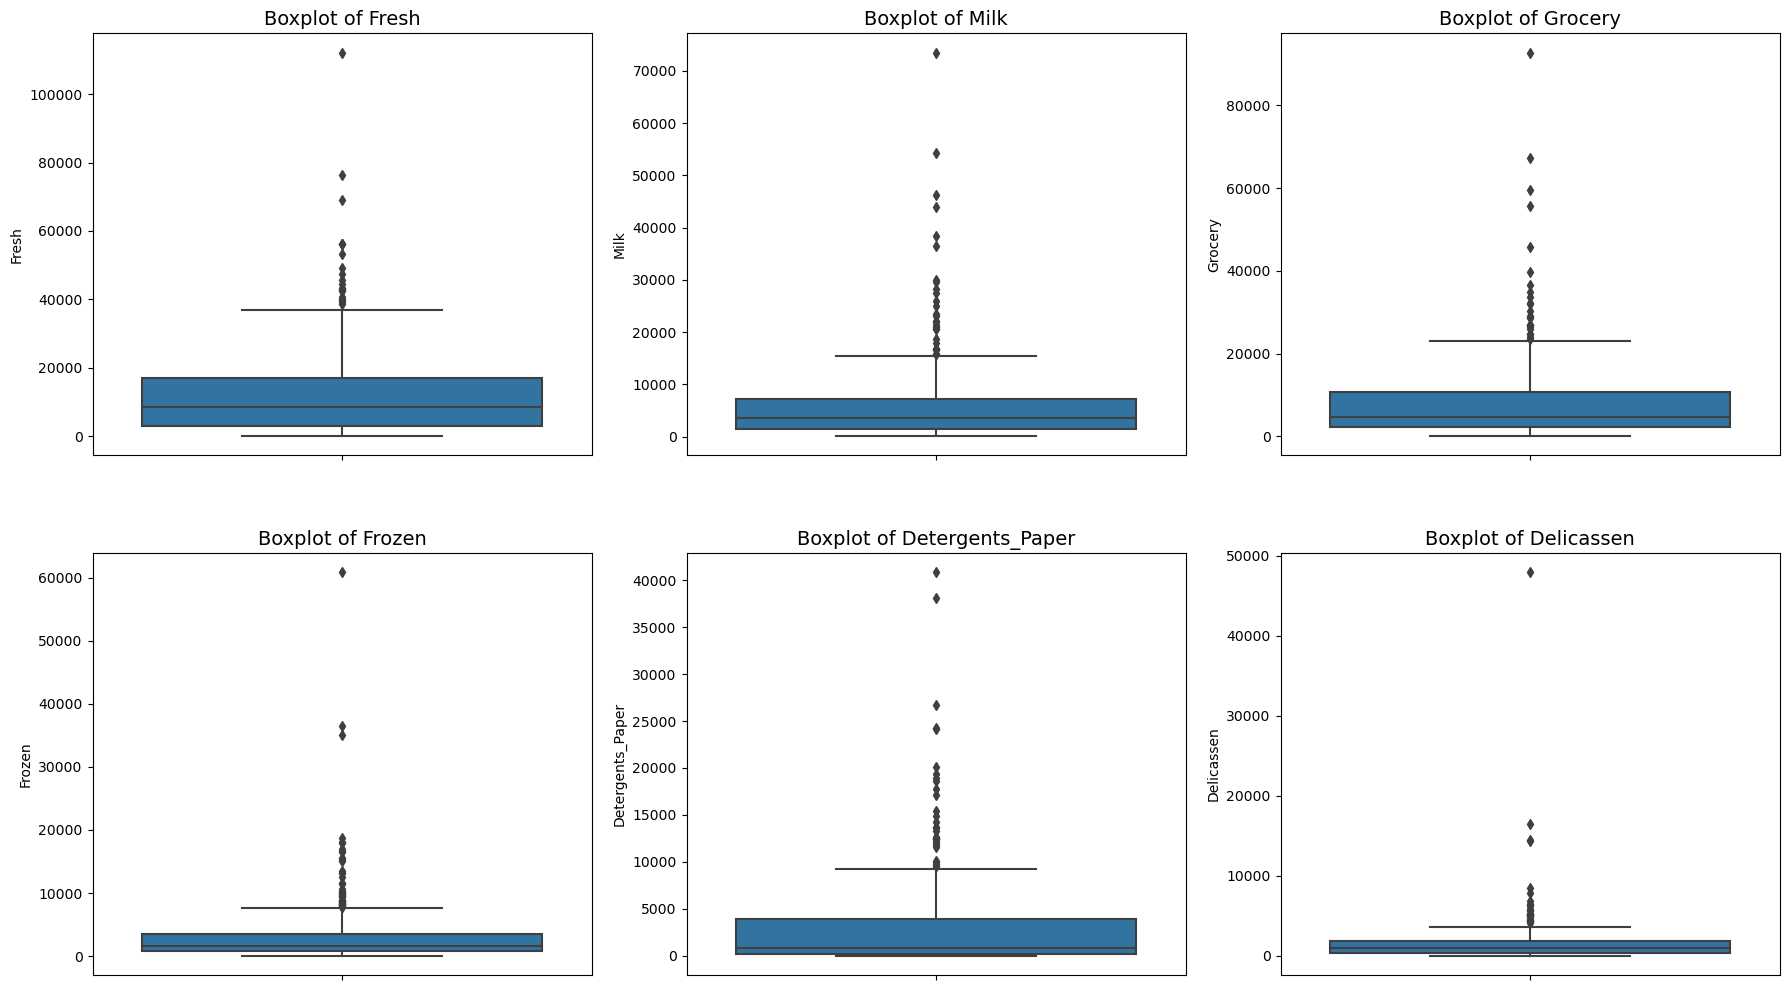

In [15]:
# Plot the boxplot of non categorical variables
non_categorical_variables = wholesales_df.drop(columns=['Channel', 'Region'])

# Determine the number of rows and columns for subplot grid
n = len(non_categorical_variables.columns)
ncols = 3
nrows = n // ncols + n % ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5*nrows))

for ax, column in zip(axes.flatten(), non_categorical_variables.columns):
    sns.boxplot(data=non_categorical_variables, y=column, ax=ax)
    ax.set_title(f"Boxplot of {column}", fontsize=14)
    
    # Calculate Q1, Q3, and IQR
    Q1 = non_categorical_variables[column].quantile(0.25)
    Q3 = non_categorical_variables[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the range for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    outliers = wholesales_df[(non_categorical_variables[column] < lower_bound) | (non_categorical_variables[column] > upper_bound)]
    print(f"The number of outliers in {column} is {len(outliers)}")

plt.tight_layout(pad=1.08, h_pad=5, w_pad=1.5)
plt.show()

#### Handling Outliers
For simplicity, we employ the capping method to handle outliers, that is capping the outliers at a certain value. For example, we decided that any value above the 95th percentile for a given column is an outlier and should be set to the value at the 95th percentile.

In [17]:
# Create a copy of the DataFrame to avoid modifying the original data
mod_wholesales_df = wholesales_df.copy()

# List of columns to check for outliers
columns_to_check = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Cap outliers for each column
for column in columns_to_check:
    # Calculate the IQR of the column
    Q1, Q3 = mod_wholesales_df[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers using clip
    mod_wholesales_df[column] = wholesales_df[column].clip(lower=lower_bound, upper=upper_bound)

In [18]:
mod_wholesales_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.00000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,11357.568182,5048.592045,7236.37500,2507.085795,2392.616477,1266.715341
std,0.468052,0.774272,10211.542235,4386.377073,6596.53308,2408.297738,2940.794090,1083.069792
min,1.000000,1.000000,3.000000,55.000000,3.00000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.00000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.50000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.75000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,37642.750000,15676.125000,23409.87500,7772.250000,9419.875000,3938.250000


The number of outliers in Fresh is 0
The number of outliers in Milk is 0
The number of outliers in Grocery is 0
The number of outliers in Frozen is 0
The number of outliers in Detergents_Paper is 0
The number of outliers in Delicassen is 0


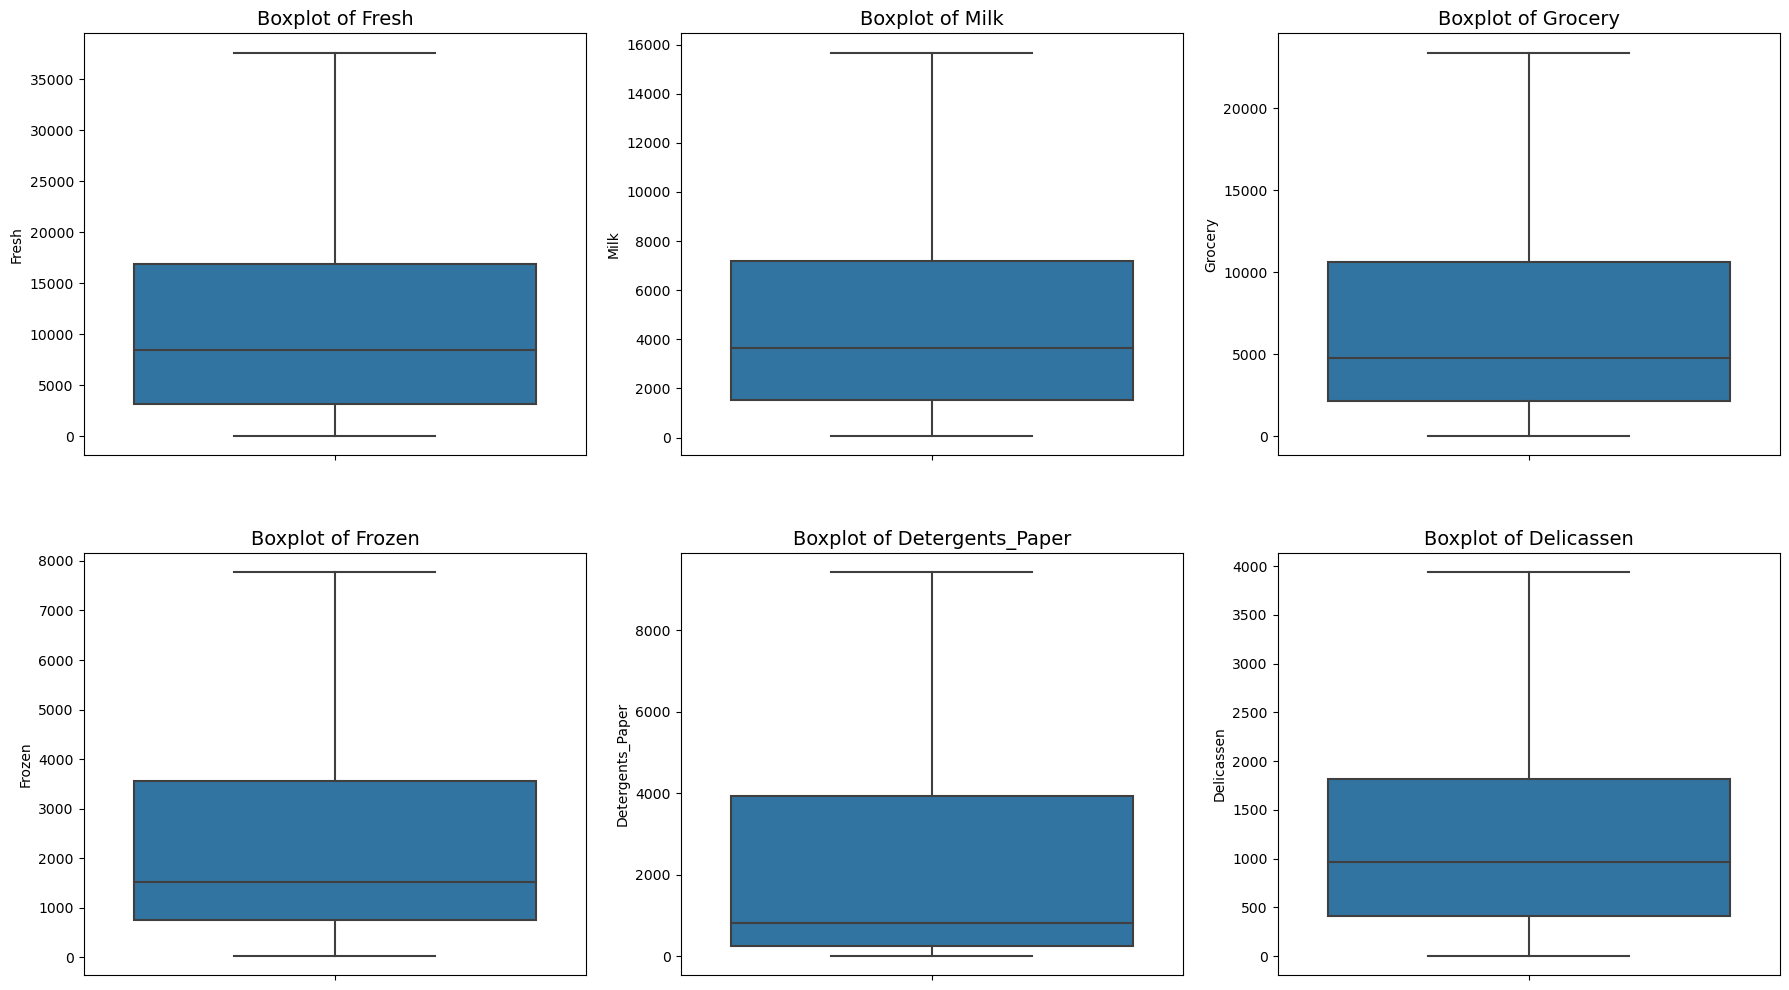

In [19]:
# Plot the boxplot of non categorical variables after handling outliers
non_categorical_variables = mod_wholesales_df.drop(columns=['Channel', 'Region'])

# Determine the number of rows and columns for subplot grid
n = len(non_categorical_variables.columns)
ncols = 3
nrows = n // ncols + n % ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5*nrows))

for ax, column in zip(axes.flatten(), non_categorical_variables.columns):
    sns.boxplot(data=non_categorical_variables, y=column, ax=ax)
    ax.set_title(f"Boxplot of {column}", fontsize=14)
    
    # Calculate Q1, Q3, and IQR
    Q1 = non_categorical_variables[column].quantile(0.25)
    Q3 = non_categorical_variables[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the range for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    outliers = mod_wholesales_df[(non_categorical_variables[column] < lower_bound) | (non_categorical_variables[column] > upper_bound)]
    print(f"The number of outliers in {column} is {len(outliers)}")

plt.tight_layout(pad=1.08, h_pad=5, w_pad=1.5)
plt.show()

## Correlation Analysis

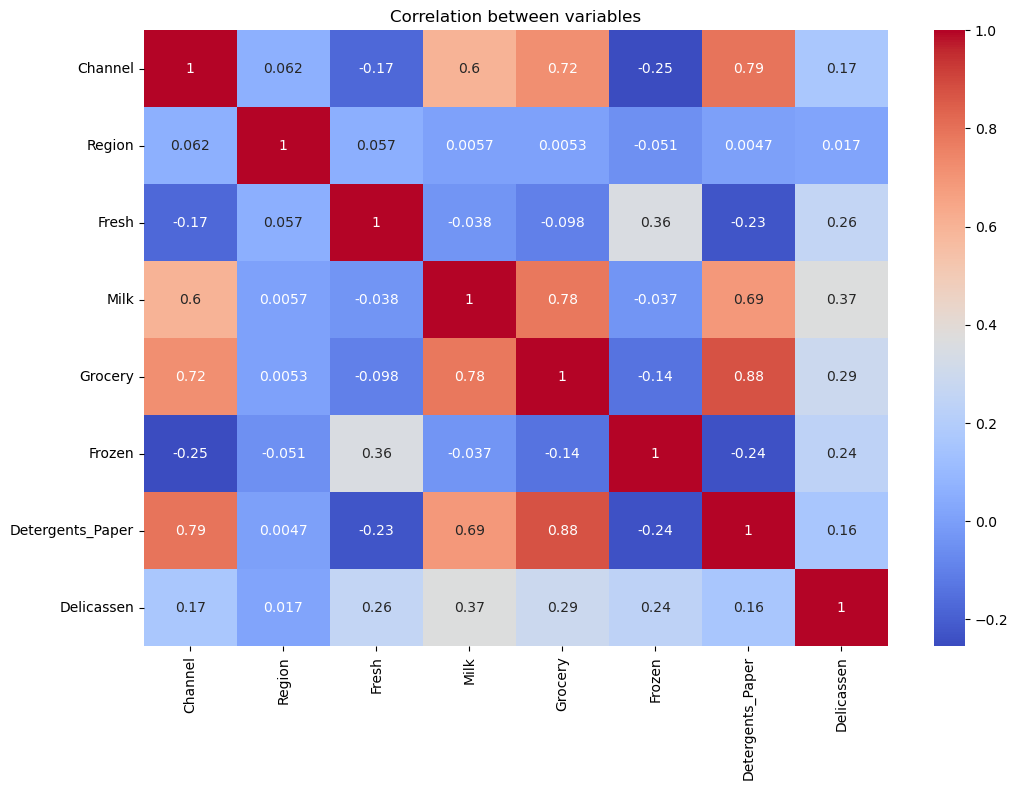

In [20]:
# Correlation heatmap between feature variables
plt.figure(figsize=(12,8))
corr = mod_wholesales_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between variables')
plt.show()

In [21]:
mod_wholesales_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669.00,9656.0,7561.000,214.00,2674.000,1338.00
1,2,3,7057.00,9810.0,9568.000,1762.00,3293.000,1776.00
2,2,3,6353.00,8808.0,7684.000,2405.00,3516.000,3938.25
3,1,3,13265.00,1196.0,4221.000,6404.00,507.000,1788.00
4,2,3,22615.00,5410.0,7198.000,3915.00,1777.000,3938.25
...,...,...,...,...,...,...,...,...
435,1,3,29703.00,12051.0,16027.000,7772.25,182.000,2204.00
436,1,3,37642.75,1431.0,764.000,4510.00,93.000,2346.00
437,2,3,14531.00,15488.0,23409.875,437.00,9419.875,1867.00
438,1,3,10290.00,1981.0,2232.000,1038.00,168.000,2125.00


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [23]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [109]:
# Extract selected features for clustering
selected_features = mod_wholesales_df.drop(['Channel','Region'], axis=1) # Exclude categorical features if any
labels = mod_wholesales_df['Channel']  # Assuming 'Channel' is the label/target column

# Pre-processing
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(selected_features), columns=selected_features.columns)

In [28]:
df_scaled

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.128573,1.051586,0.049267,-0.953244,0.095792,0.065892
1,-0.421627,1.086735,0.353865,-0.309735,0.306519,0.470759
2,-0.490647,0.858040,0.067935,-0.042437,0.382435,2.469440
3,0.187004,-0.879308,-0.457635,1.619962,-0.641923,0.481851
4,1.103677,0.082487,-0.005824,0.585275,-0.209575,2.469440
...,...,...,...,...,...,...
435,1.798584,1.598216,1.334130,2.188748,-0.752563,0.866381
436,2.576996,-0.825672,-0.982295,0.832619,-0.782861,0.997640
437,0.311123,2.382670,2.454609,-0.860542,2.392299,0.554875
438,-0.104664,-0.700141,-0.759501,-0.610704,-0.757329,0.793358


In [75]:
# Dimentional reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(continuous_features)

### The Elbow Method

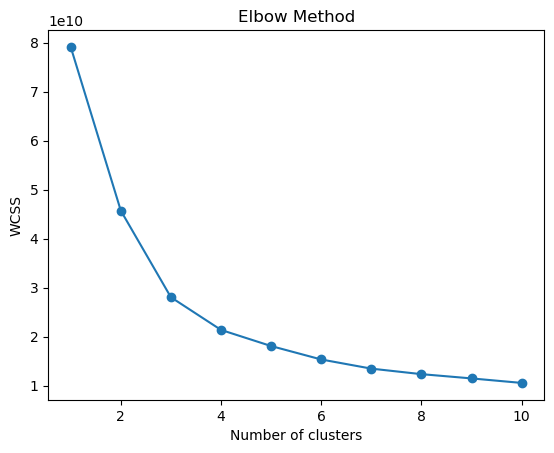

In [76]:
# Determine the optimal number of clusters using the elbow method
wcss = []  # within-cluster sum of squares
range_n_clusters = list(range(1,11))  # the range of cluster numbers you want to consider

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range_n_clusters, wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Based on the "Elbow Method" graph above, the x-axis represents the “Number of clusters” and ranges from 2 to 10, while the y-axis represents “WCSS” and ranges from 1000 to 4500. The line decreases sharply from 2 to 4 clusters, then gradually decreases from 4 to 10 clusters.

Therefore, the inflection point appears to be at 4 clusters. This suggests that 4 might be the optimal number of clusters for your k-means clustering analysis.

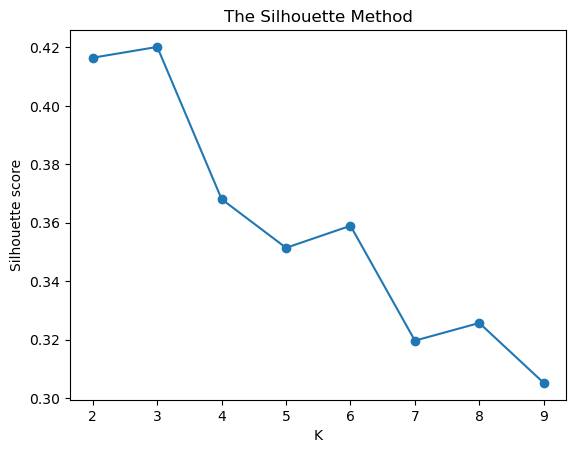

In [77]:
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters
silhouette_scores = []  # stores silhouette scores for different number of clusters
range_n_clusters = list(range(2,10))  # the range of cluster numbers you want to consider

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X_pca)
    score = silhouette_score(X_pca, preds)
    silhouette_scores.append(score)

sil_optimal_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]

# Plot the silhouette graph
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('The Silhouette Method')
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.show()

### Implementing K-Means Model

In [84]:
n_clusters = 3

# Implementing K-Means
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42)
kmeans.fit(X_pca)

KMeans(n_clusters=3, random_state=42)

In [79]:
kmean_wholesales_df = mod_wholesales_df.copy()
# Add cluster labels to your original dataframe
kmean_wholesales_df['KMeans_Cluster'] = kmeans.labels_

kmean_wholesales_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMeans_Cluster
0,2,3,12669.0,9656.0,7561.0,214.0,2674.0,1338.00,0
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.00,2
2,2,3,6353.0,8808.0,7684.0,2405.0,3516.0,3938.25,0
3,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.00,0
4,2,3,22615.0,5410.0,7198.0,3915.0,1777.0,3938.25,1


In [80]:
# Check the size of each cluster
print("Cluster Sizes:\n", kmean_wholesales_df['KMeans_Cluster'].value_counts())

Cluster Sizes:
 KMeans_Cluster
0    226
1    112
2    102
Name: count, dtype: int64


In [81]:
kmeans.cluster_centers_

array([[-3.51307049e+03, -5.21996639e+03,  2.40135687e+02,
        -3.06037614e+01],
       [ 1.47333285e+04,  1.33759428e+03, -3.71670479e+01,
         1.13508164e+01],
       [-8.39391041e+03,  1.00970769e+04, -4.91254469e+02,
         5.53446926e+01]])

In [82]:
kmeans.labels_

array([0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 1, 2, 1, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 1,
       0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2, 2, 0, 2,
       0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 0, 1, 1, 2,
       0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0,
       0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       2, 2, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1,

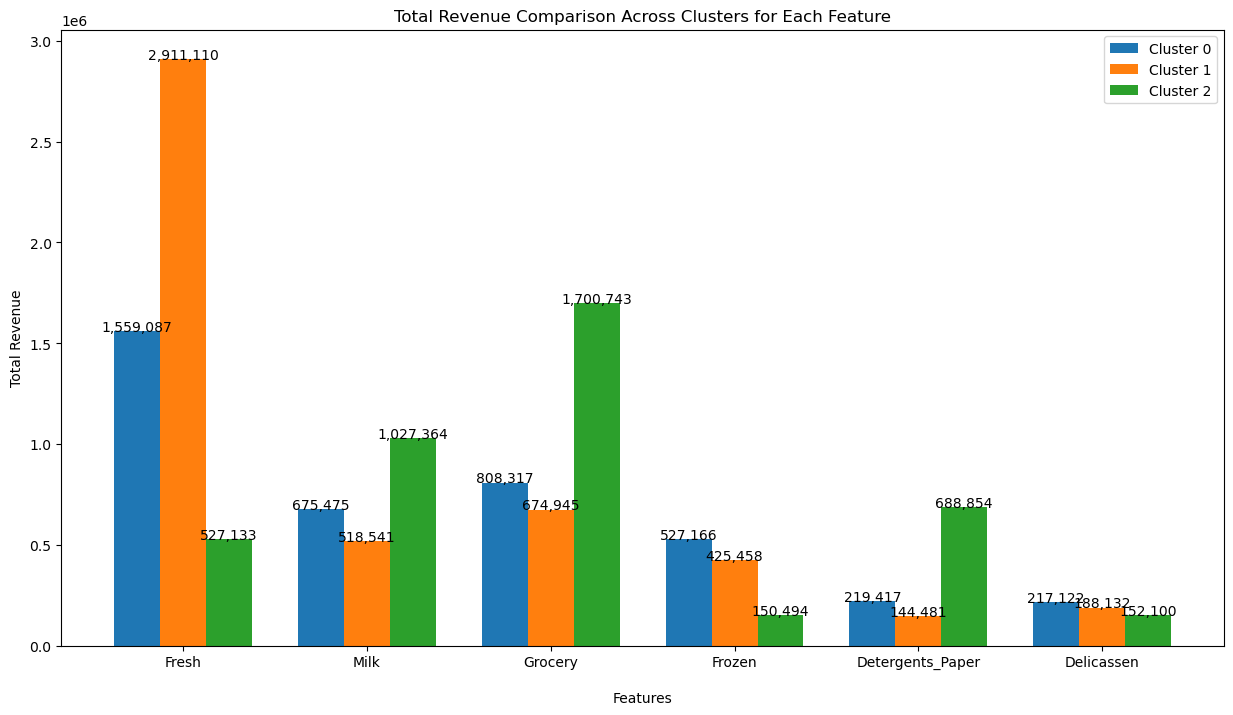

In [99]:
# Calculate total revenue for each cluster
total_revenue = kmean_wholesales_df.groupby('KMeans_Cluster').sum().drop(['Region', 'Channel'], axis=1)

# Plot a side-by-side bar chart for all clusters
clusters = sorted(kmean_wholesales_df['KMeans_Cluster'].unique())
features = [col for col in kmean_wholesales_df.columns if col not in ['Region', 'Channel', 'KMeans_Cluster']]

bar_width = 0.25  # width of the bars
bar_positions = np.arange(len(features))

plt.figure(figsize=(15, 8))

for i, cluster in enumerate(clusters):
    plt.bar(bar_positions + i * bar_width, total_revenue.loc[cluster], width=bar_width, label=f'Cluster {cluster}')
    
# Add value labels on each bar
for i, cluster in enumerate(clusters):
    for j, feature in enumerate(features):
        plt.text(bar_positions[j] + i * bar_width, total_revenue.loc[cluster][feature] + 20,
                 f'{total_revenue.loc[cluster][feature]:,.0f}', ha='center')

plt.title('Total Revenue Comparison Across Clusters for Each Feature')
plt.xlabel('Features')
plt.ylabel('Total Revenue')
plt.xticks(bar_positions + (len(clusters) - 1) * bar_width / 2, [f'{feature}\n' for feature in features])
plt.legend()
plt.show()

The bar graph above represents the total revenue generated by different features across three clusters: Cluster 0, Cluster 1, and Cluster 2. The features include Milk, Grocery, Frozen, Detergents_Paper, and Delicassen.

- **Milk, Grocery, and Detergents_Paper:** Cluster 2 has the highest total revenue for these features. This suggests that Cluster 0 might represent entities (like customers or regions) that have high consumption or sales of Milk, Grocery, and Detergents_Paper.

- **Frozen and Delicassen:** Cluster 0 has the highest total revenue for these features, indicating that this cluster might represent entities with high consumption or sales of Frozen and Delicassen products.

- **Cluster 1:** This cluster has the lowest total revenue for all features except Fresh, suggesting that it might represent entities with overall lower consumption or sales.

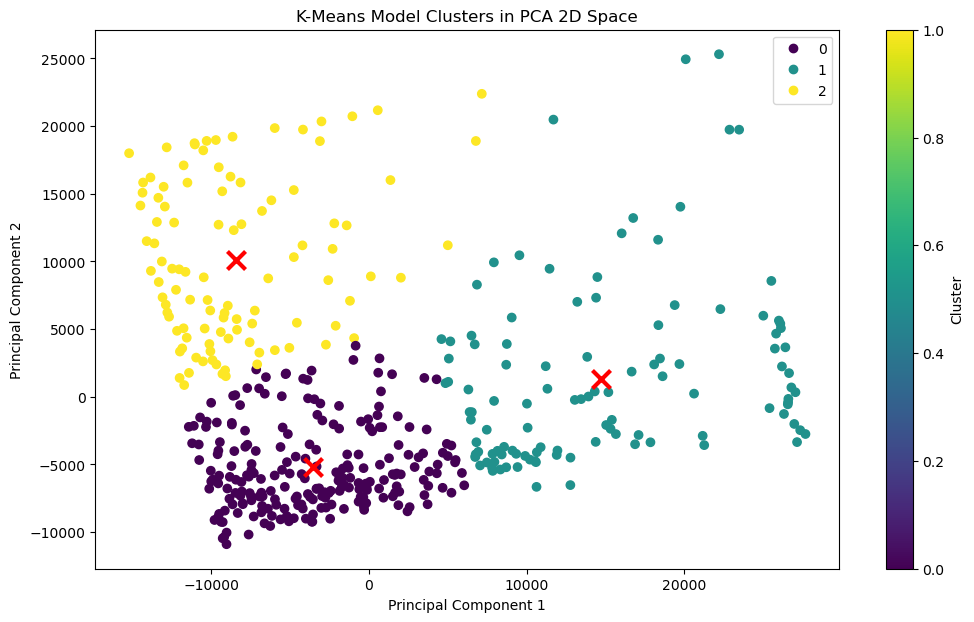

In [104]:
from sklearn.decomposition import PCA

# Apply PCA and fit the features selected
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(kmean_wholesales_df.drop('KMeans_Cluster', axis=1))

# Create a DataFrame with the two components
PCA_components = pd.DataFrame(principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Concatenate the clusters labels to the DataFrame
PCA_components['KMeans_Cluster'] = kmean_wholesales_df['KMeans_Cluster']

# Plot the clustered dataset
plt.figure(figsize=(12,7))
scatter = plt.scatter(PCA_components['Principal Component 1'], PCA_components['Principal Component 2'], c=PCA_components['KMeans_Cluster'])

# Calculate the centroids
centroids = PCA_components.groupby('KMeans_Cluster').mean()

# Plot the centroids
plt.scatter(centroids['Principal Component 1'], centroids['Principal Component 2'], marker='x', s=169, linewidths=3, color='r', zorder=10)

plt.title('K-Means Model Clusters in PCA 2D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend(handles=scatter.legend_elements()[0], labels=set(PCA_components['KMeans_Cluster']))
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

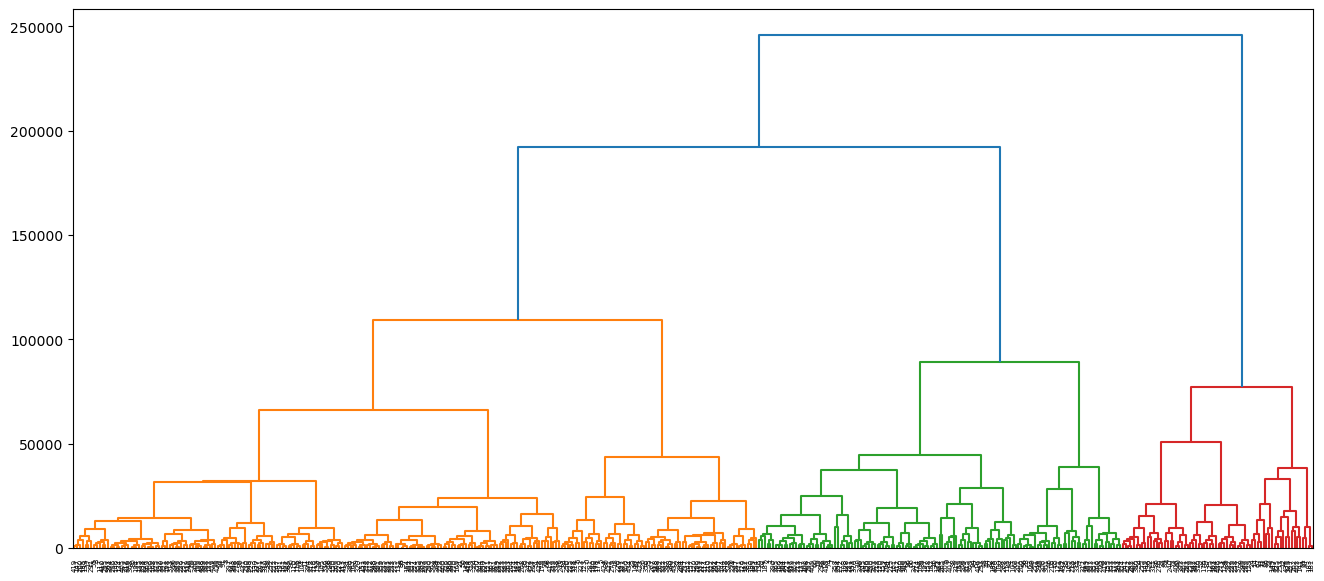

In [65]:
# Import necessary libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering
linked = linkage(X_pca, 'ward')

# Plot the dendrogram
plt.figure(figsize=(16, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

Based on the dendrogram in the image, the optimal number of clusters is determined by the longest vertical line that isn’t crossed by any extended horizontal lines. It appears that the longest vertical line is the blue one. If you draw a horizontal line through the middle of this line (around the height of 150,000 on the y-axis), it crosses three vertical lines at its ends. **Therefore, the optimal number of clusters for this dataset would be 3.**

In [100]:
n_clusters = 3  # replace with the number of clusters you determined

# Perform Agglomerative Clustering with the optimal number of clusters
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(X_pca)

agglo_wholesales_df = mod_wholesales_df.copy()

# Add cluster labels to your original dataframe
agglo_wholesales_df['Hierarchical_Cluster'] = cluster_labels

agglo_wholesales_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Hierarchical_Cluster
0,2,3,12669.0,9656.0,7561.0,214.0,2674.0,1338.00,0
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.00,2
2,2,3,6353.0,8808.0,7684.0,2405.0,3516.0,3938.25,2
3,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.00,0
4,2,3,22615.0,5410.0,7198.0,3915.0,1777.0,3938.25,1


In [101]:
# Check the size of each cluster
print("Cluster Sizes:\n", agglo_wholesales_df['Hierarchical_Cluster'].value_counts())

Cluster Sizes:
 Hierarchical_Cluster
0    243
2    129
1     68
Name: count, dtype: int64


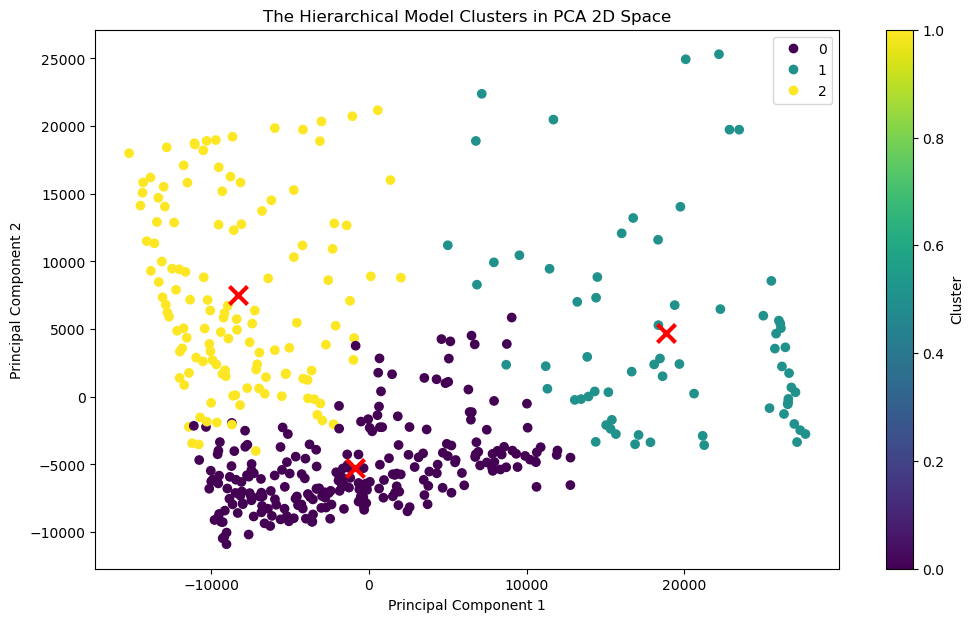

In [103]:
from sklearn.decomposition import PCA

# Apply PCA and fit the features selected
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(agglo_wholesales_df.drop('Hierarchical_Cluster', axis=1))

# Create a DataFrame with the two components
PCA_components = pd.DataFrame(principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Concatenate the clusters labels to the DataFrame
PCA_components['Hierarchical_Cluster'] = agglo_wholesales_df['Hierarchical_Cluster']

# Plot the clustered dataset
plt.figure(figsize=(12,7))
scatter = plt.scatter(PCA_components['Principal Component 1'], PCA_components['Principal Component 2'], c=PCA_components['Hierarchical_Cluster'])

# Calculate the centroids
centroids = PCA_components.groupby('Hierarchical_Cluster').mean()

# Plot the centroids
plt.scatter(centroids['Principal Component 1'], centroids['Principal Component 2'], marker='x', s=169, linewidths=3, color='r', zorder=10)

plt.title('The Hierarchical Model Clusters in PCA 2D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend(handles=scatter.legend_elements()[0], labels=set(PCA_components['Hierarchical_Cluster']))
plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

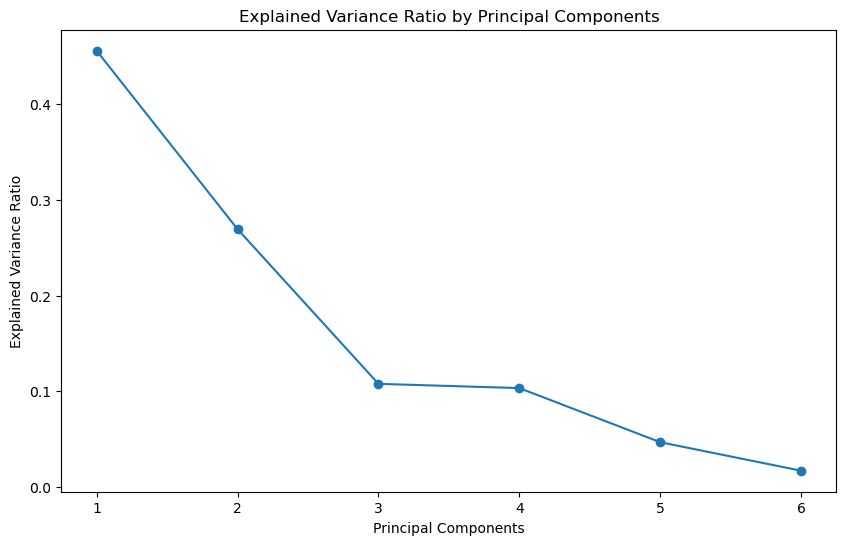

In [110]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(features_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [114]:
# Get the principal components and their corresponding feature names
pc_feature_names = [f'PC{i}' for i in range(1, principal_components.shape[1] + 1)]
principal_components_df = pd.DataFrame(data=pca.components_, columns=features_scaled.columns, index=pc_feature_names)

# Display the DataFrame with principal components and feature names
principal_components_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
PC1,-0.107593,0.532871,0.573967,-0.124061,0.554450,0.228535
PC2,0.590956,0.134659,0.019919,0.579884,-0.123954,0.529727
PC3,-0.614570,0.059082,0.016010,0.768547,0.045574,-0.160668
PC4,-0.506407,-0.066964,-0.191641,-0.220118,-0.206980,0.781696
PC5,-0.036289,0.815196,-0.247541,-0.093098,-0.485387,-0.169100


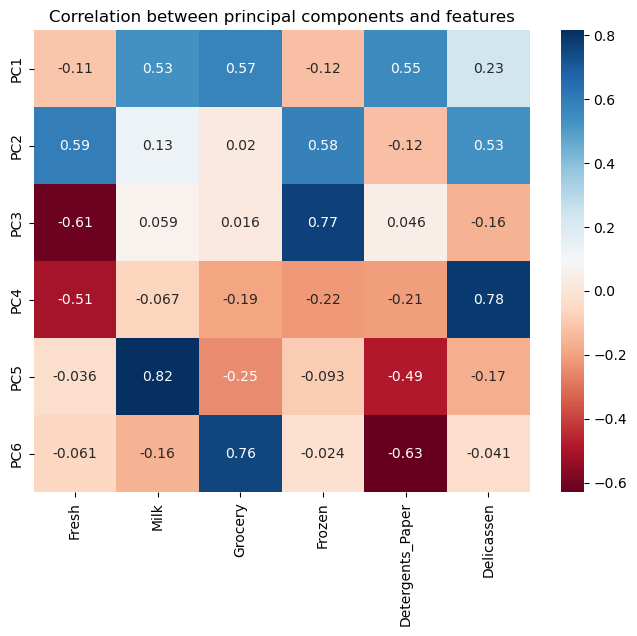

In [119]:
# Generate the headmap of principal components and their corresponding feature names
plt.figure(figsize=(8,6))
sns.heatmap(principal_components_df, annot=True, cmap='RdBu')
plt.title('Correlation between principal components and features')
plt.show()

The heatmap above represents the correlation between principal components (PCs) and features. Each PC is a compound combination of features that best describes a certain aspect of the customers. Here’s what each PC might represent based on the correlations:

- **PC1:** This principal component has strong positive correlations with Milk, Grocery, and Detergents_Paper. This suggests that PC1 might represent customers who purchase a lot of Milk, Grocery, and Detergents_Paper products.

- **PC2:** This principal component has strong positive correlations with all features, but particularly with Frozen and Delicassen. This suggests that PC2 might represent customers who purchase a variety of products, but especially Frozen and Delicassen products.

- **PC3:** This principal component has a strong positive correlation with Delicassen and a strong negative correlation with Frozen. This suggests that PC3 might represent customers who purchase a lot of Delicassen products but few Frozen products.

- **PC4:** This principal component has a strong positive correlation with Frozen and a strong negative correlation with Detergents_Paper. This suggests that PC4 might represent customers who purchase a lot of Frozen products but few Detergents_Paper products.

- **PC5:** This principal component has a strong positive correlation with Milk and a strong negative correlation with Detergents_Paper. This suggests that PC5 might represent customers who purchase a lot of Milk products but few Detergents_Paper products.

- **PC6:** This principal component has a strong positive correlation with Grocery and a strong negative correlation with Milk. This suggests that PC6 might represent customers who purchase a lot of Grocery products but few Milk products.

These interpretations are based on the assumption that a strong positive correlation indicates a high consumption or sales of a feature, while a strong negative correlation indicates a low consumption or sales of a feature.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

Based on the model developed and the exploratory data analysis (EDA) conducted, here are four key findings:

- **Three Distinct Clusters:** The KMeans and hierarchical models identified three distinct clusters of customers. Each cluster represents a group of customers with similar purchasing behaviors.

- **Principal Components Analysis (PCA):** The first two principal components captured significant variance in the data. These components represent compound combinations of features that best describe the customers.

- **Feature Importance:** Certain features, such as Milk, Grocery, and Detergents_Paper, significantly distinguished different customer groups. These features had strong positive correlations with specific principal components.

- **Outliers:** The model identified a few outliers or points of interest that differed notably from the others. These outliers represent unique customer behaviours that warrant further investigation.

These findings provide valuable insights into customer behaviors and can guide decision-making in areas like marketing strategy, customer segmentation, and product development. 